In [2]:
%matplotlib inline
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import warnings
from collections import Counter
import sys
import os
from __future__ import division
plt.rcParams["figure.figsize"] = (20,10)
import tqdm as tqdm

warnings.filterwarnings('ignore')
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

In [3]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [4]:
books = []
for i in range(5):
    books.append(pd.read_csv('drive/MyDrive/lab4/asoiaf-book{}-edges.csv'.format(i+1)))

In [5]:
all_books = pd.concat(books)

In [6]:
all_books

Source                        Target  \
0                     Addam-Marbrand               Jaime-Lannister   
1                     Addam-Marbrand               Tywin-Lannister   
2                  Aegon-I-Targaryen            Daenerys-Targaryen   
3                  Aegon-I-Targaryen                  Eddard-Stark   
4    Aemon-Targaryen-(Maester-Aemon)                Alliser-Thorne   
..                               ...                           ...   
755                 Tyrion-Lannister                        Ysilla   
756                  Tywin-Lannister                Wylis-Manderly   
757                Victarion-Greyjoy                         Wulfe   
758      Walder-Frey-(son-of-Jammos)  Walder-Frey-(son-of-Merrett)   
759                           Yandry                        Ysilla   

           Type  weight  book  
0    Undirected       3   1.0  
1    Undirected       6   1.0  
2    Undirected       5   1.0  
3    Undirected       4   1.0  
4    Undirected       4   1.0  
..          ...     ...   ...  
755  undirected      11   5.0  
756  undirected       3   5.0  
757  undirected       3   5.0  
758  undirected      10   5.0  
759  undirected      14   5.0  

[3909 rows x 5 columns]

In [7]:
edges = all_books.groupby(['Source','Target']).agg({'weight':'sum'}).reset_index()

In [8]:
edges.sort_values('weight',ascending=False)

Source              Target  weight
1334           Eddard-Stark    Robert-Baratheon     334
2031               Jon-Snow       Samwell-Tarly     228
1965      Joffrey-Baratheon         Sansa-Stark     222
1972      Joffrey-Baratheon    Tyrion-Lannister     219
640              Bran-Stark               Hodor     209
...                     ...                 ...     ...
1809        Jaime-Lannister            Joy-Hill       3
1805        Jaime-Lannister            Jon-Snow       3
1802          Jafer-Flowers       Jaremy-Rykker       3
1801  Jaehaerys-I-Targaryen  Maegor-I-Targaryen       3
0            Addam-Marbrand       Brynden-Tully       3

[2823 rows x 3 columns]

In [9]:
GOT = nx.from_pandas_edgelist(edges,
                            source='Source',
                            target='Target',
                            edge_attr='weight' )

In [10]:
num_nodes = GOT.number_of_nodes()
num_edges = GOT.number_of_edges()
average_degree = sum(dict(GOT.degree()).values()) / len(GOT.nodes())
info = {
    'Number of nodes': num_nodes,
    'Number of edges': num_edges,
    'Avareages degress': average_degree
}
print(info)

{'Number of nodes': 796, 'Number of edges': 2823, 'Avareages degress': 7.092964824120603}


In [11]:
weighted_degrees = dict(nx.degree(GOT,weight='weight'))
max_degree = max(weighted_degrees.values())

In [12]:
import seaborn as sns

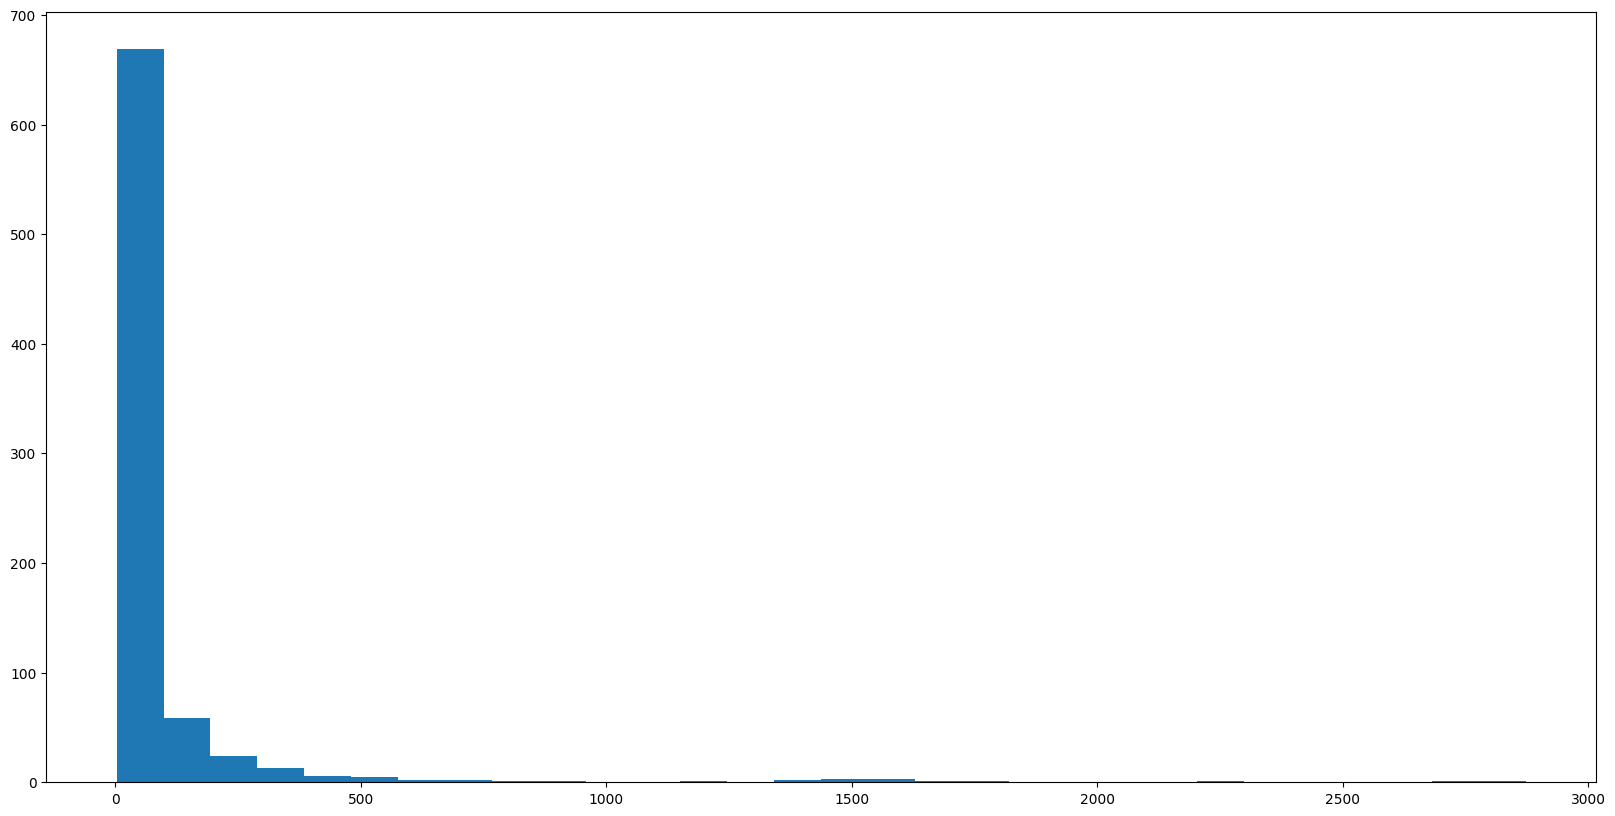

In [13]:
h = plt.hist(weighted_degrees.values(), bins = 30)

In [14]:
subG = GOT.subgraph([n for n in weighted_degrees if weighted_degrees[n]>200])

In [15]:
num_nodes = subG.number_of_nodes()
num_edges = subG.number_of_edges()
average_degree = sum(dict(subG.degree()).values()) / len(subG.nodes())
info = {
    'Number of nodes': num_nodes,
    'Number of edges': num_edges,
    'Avareages degress': average_degree
}
print(info)

{'Number of nodes': 63, 'Number of edges': 496, 'Avareages degress': 15.746031746031745}


In [16]:
pos = nx.spring_layout(subG,weight='weight',iterations=20, k = 4)

In [18]:
degrees = dict(subG.degree())
for node, degree in degrees.items():
    print(f"Bậc của nút {node} là {degree}")

Bậc của nút Osmund-Kettleblack là 10
Bậc của nút Daenerys-Targaryen là 15
Bậc của nút Selyse-Florent là 5
Bậc của nút Jon-Snow là 25
Bậc của nút Pypar là 5
Bậc của nút Davos-Seaworth là 7
Bậc của nút Doran-Martell là 9
Bậc của nút Aemon-Targaryen-(Maester-Aemon) là 9
Bậc của nút Sandor-Clegane là 19
Bậc của nút Ramsay-Snow là 9
Bậc của nút Asha-Greyjoy là 4
Bậc của nút Bronn là 10
Bậc của nút Mace-Tyrell là 13
Bậc của nút Gendry là 5
Bậc của nút Loras-Tyrell là 20
Bậc của nút Renly-Baratheon là 23
Bậc của nút Grenn là 5
Bậc của nút Edmure-Tully là 10
Bậc của nút Tywin-Lannister là 26
Bậc của nút Samwell-Tarly là 13
Bậc của nút Melisandre là 10
Bậc của nút Ilyn-Payne là 14
Bậc của nút Sansa-Stark là 32
Bậc của nút Jorah-Mormont là 8
Bậc của nút Irri là 4
Bậc của nút Tommen-Baratheon là 20
Bậc của nút Pycelle là 16
Bậc của nút Hizdahr-zo-Loraq là 4
Bậc của nút Eddard-Stark là 34
Bậc của nút Jaime-Lannister là 33
Bậc của nút Myrcella-Baratheon là 11
Bậc của nút Hodor là 7
Bậc của nút Luwi

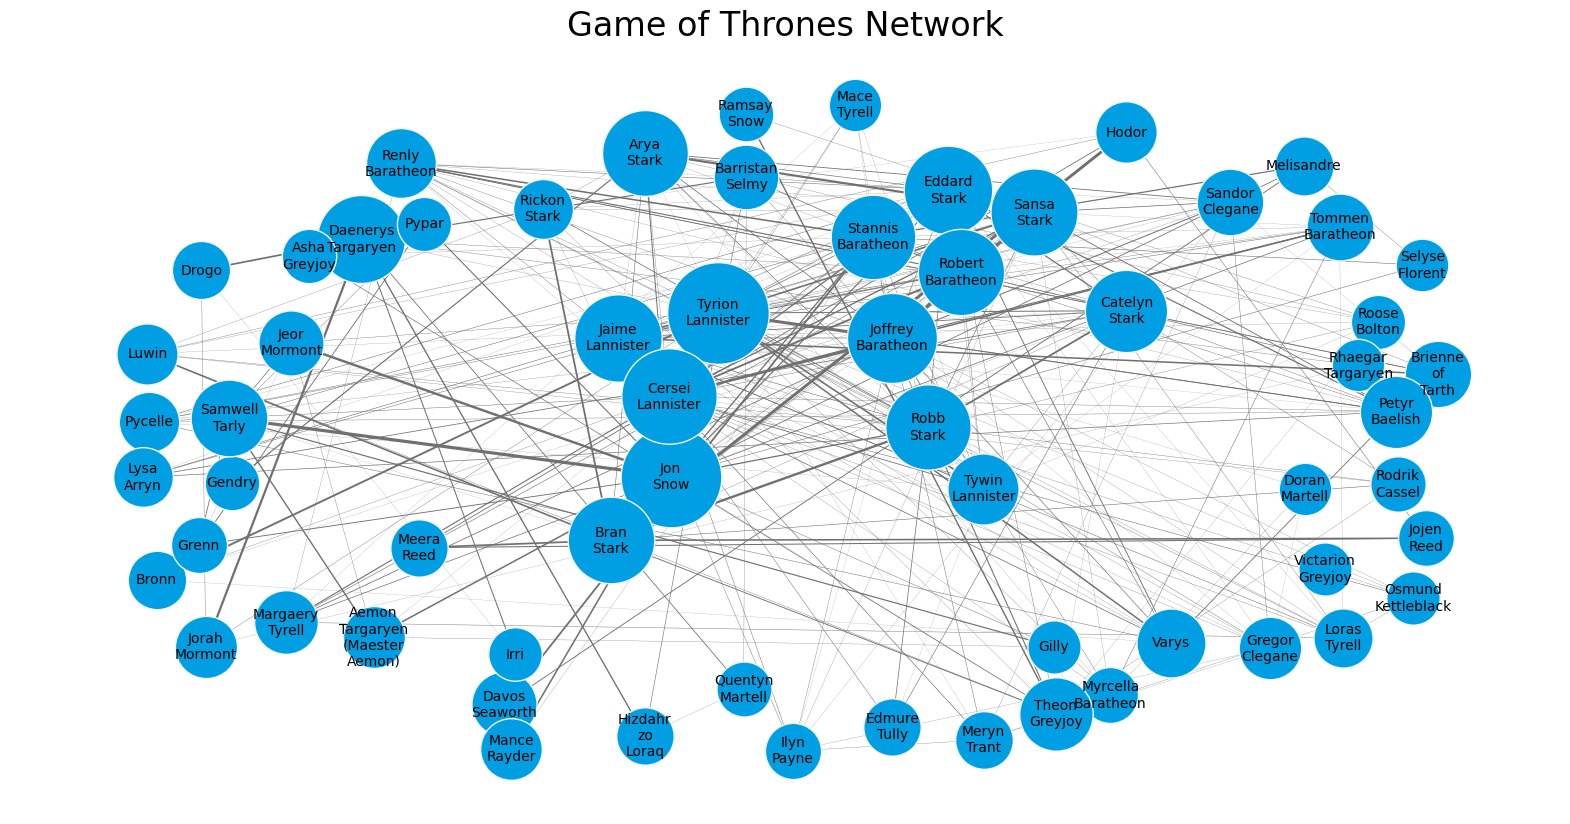

In [27]:
plt.axis('off')
plt.title('Game of Thrones Network',fontsize = 24)


for node in subG.nodes():
    size = 100*weighted_degrees[node]**0.5
    ns = nx.draw_networkx_nodes(subG,pos,nodelist=[node], node_size=size, node_color='#009fe3')
    ns.set_edgecolor('#f2f6fa')

nx.draw_networkx_labels(subG,pos,{n:n.replace('-','\n') for n in subG.nodes() if weighted_degrees[n]>100},font_size=10);

for e in subG.edges(data=True):
    if e[2]['weight']>10:
        nx.draw_networkx_edges(subG,pos,[e],width=e[2]['weight']/100,edge_color='#707070')

In [28]:
infection_times = {}

In [29]:
def independent_cascade_of_author(G,t,infection_times):
    #doing a t->t+1 step of independent_cascade simulation
    #each infectious node infects neigbors with probabilty proportional to the weight
    max_weight = max([e[2]['weight'] for e in G.edges(data=True)])
    current_infectious = [n for n in infection_times if infection_times[n]==t]
    for n in current_infectious:
        for v in G.neighbors(n):
            if v not in infection_times:
                if  G.get_edge_data(n,v)['weight'] >= np.random.random()*max_weight:
                    infection_times[v] = t+1
    return infection_times

In [30]:
def plot_G(G,pos,infection_times,t):
    current_infectious = [n for n in infection_times if infection_times[n]==t]
    plt.figure()
    plt.axis('off')
    plt.title('Game of Thrones Network, t={}'.format(t),fontsize = 24)

    for node in G.nodes():
        size = 100*weighted_degrees[node]**0.5
        if node in current_infectious:
            ns = nx.draw_networkx_nodes(G,pos,nodelist=[node], node_size=size, node_color='#feba02')
        elif infection_times.get(node,9999999)<t:
            ns = nx.draw_networkx_nodes(G,pos,nodelist=[node], node_size=size, node_color='#f2f6fa')
        else:
            ns = nx.draw_networkx_nodes(G,pos,nodelist=[node], node_size=size, node_color='#009fe3')
        ns.set_edgecolor('#f2f6fa')
    nx.draw_networkx_labels(G,pos,{n:n.replace('-','\n') for n in G.nodes() if weighted_degrees[n]>100},font_size=10);

    for e in G.edges(data=True):
        if e[2]['weight']>10:
            nx.draw_networkx_edges(G,pos,[e],width=e[2]['weight']/100,edge_color='#707070')


In [31]:
infection_times = {'Bran-Stark':-1,'Samwell-Tarly':-1,'Jon-Snow':0}

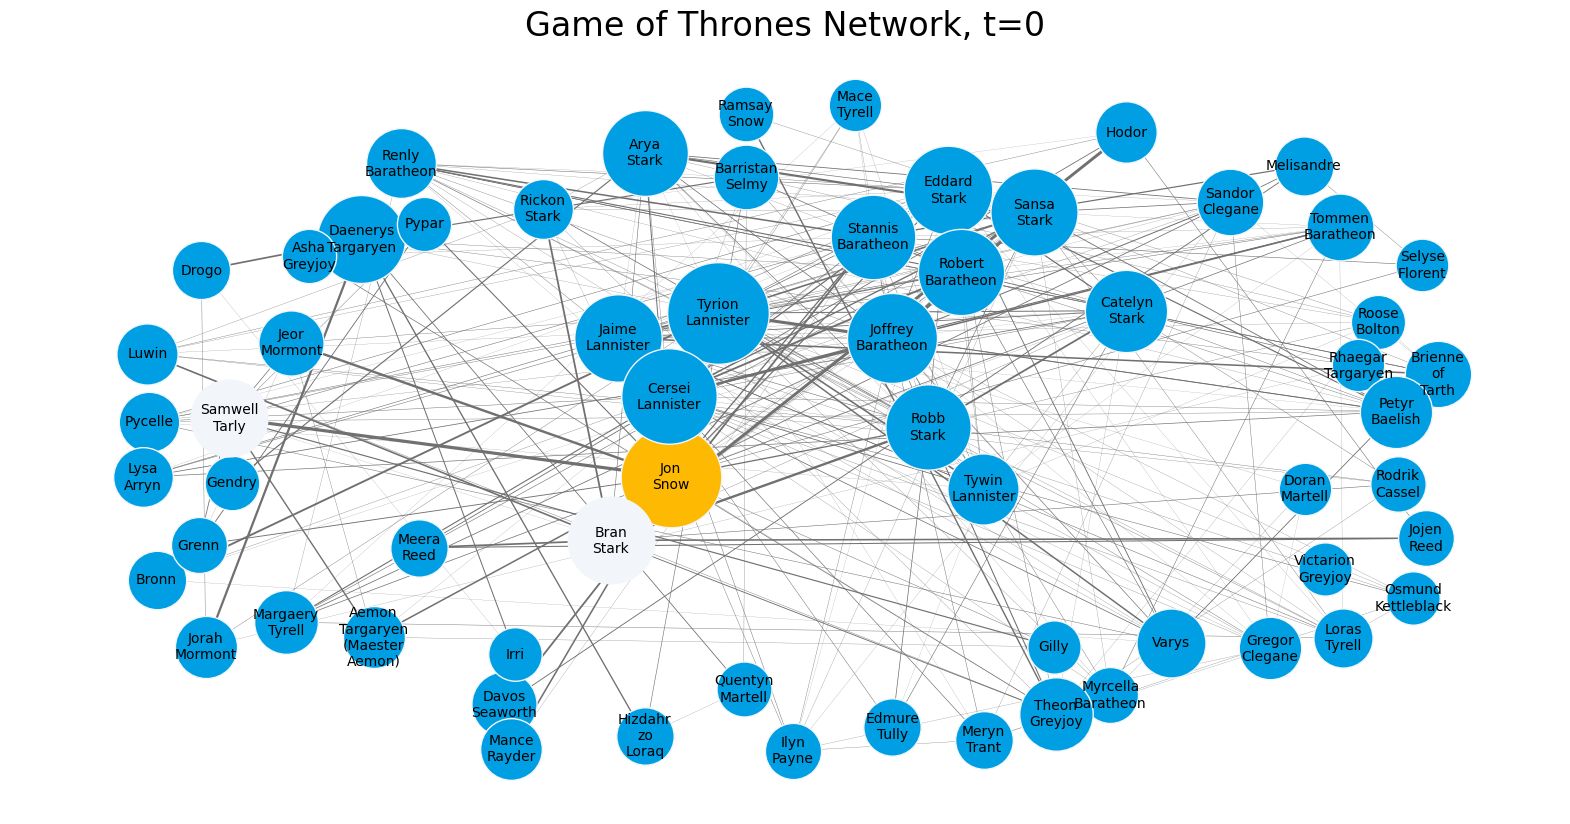

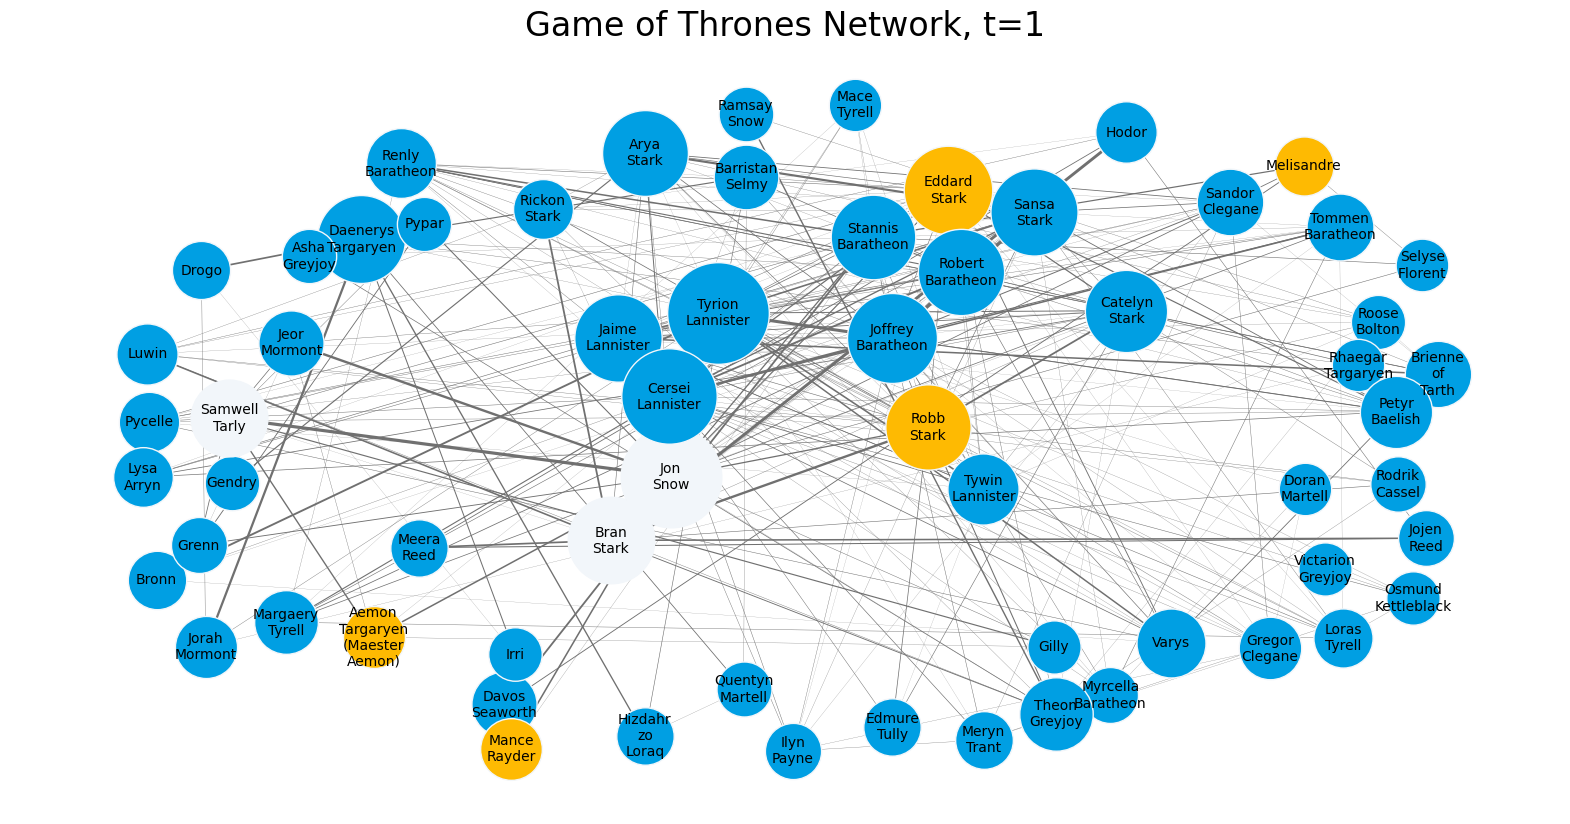

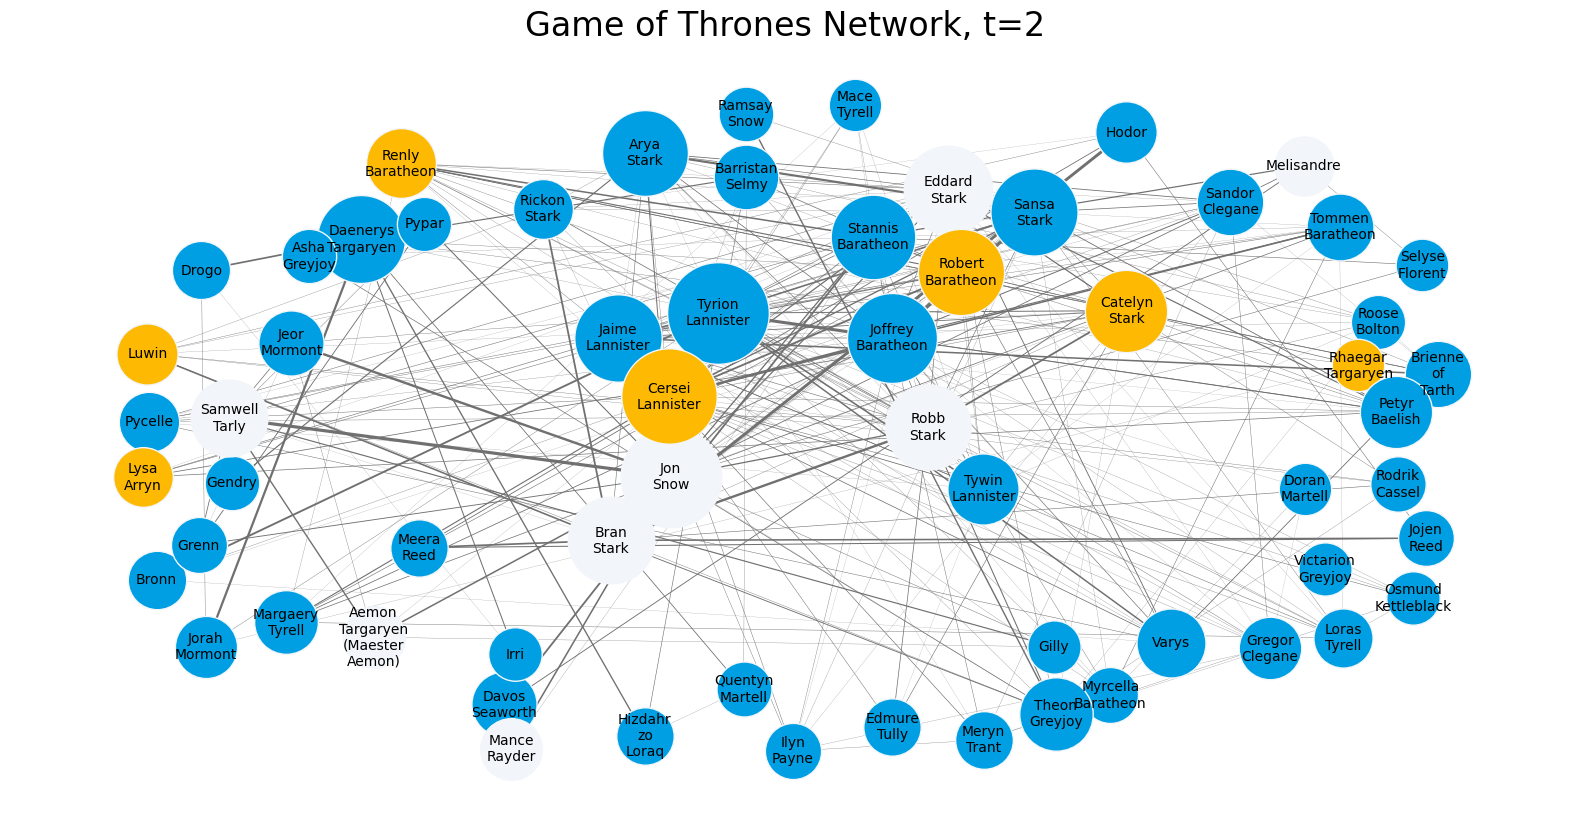

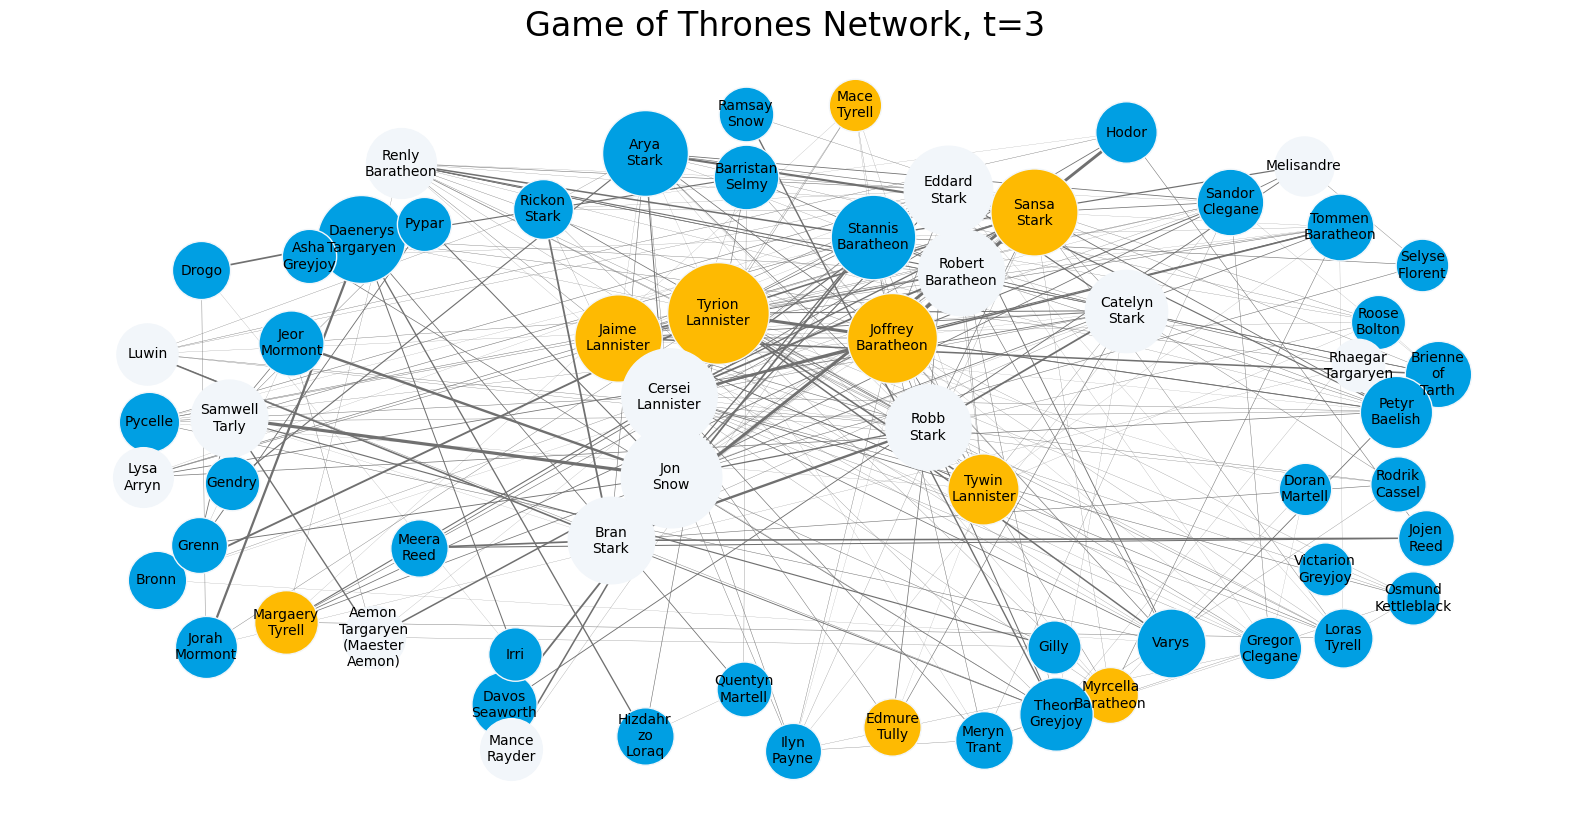

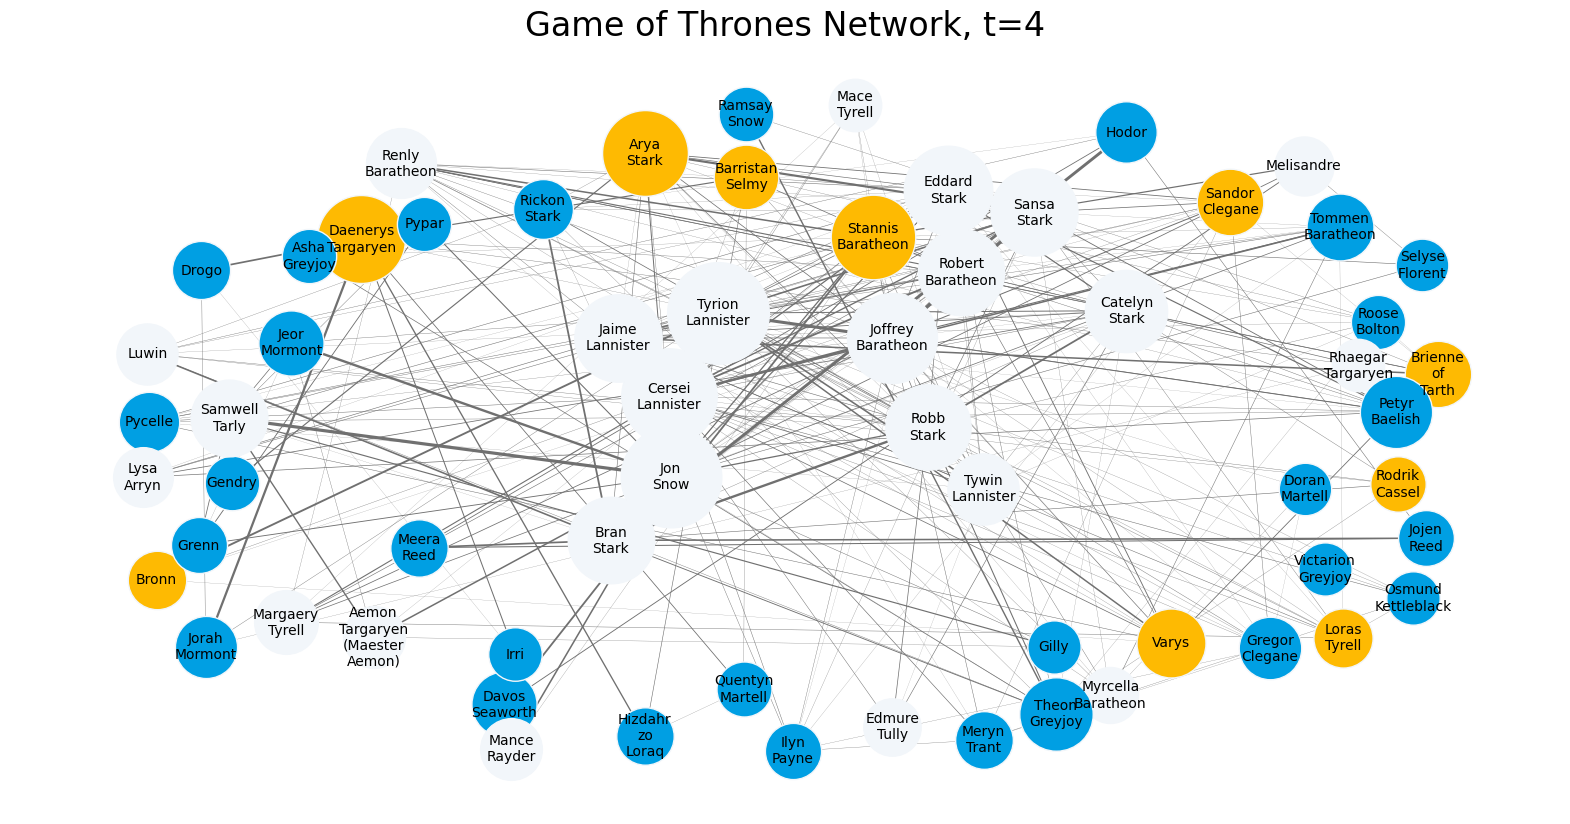

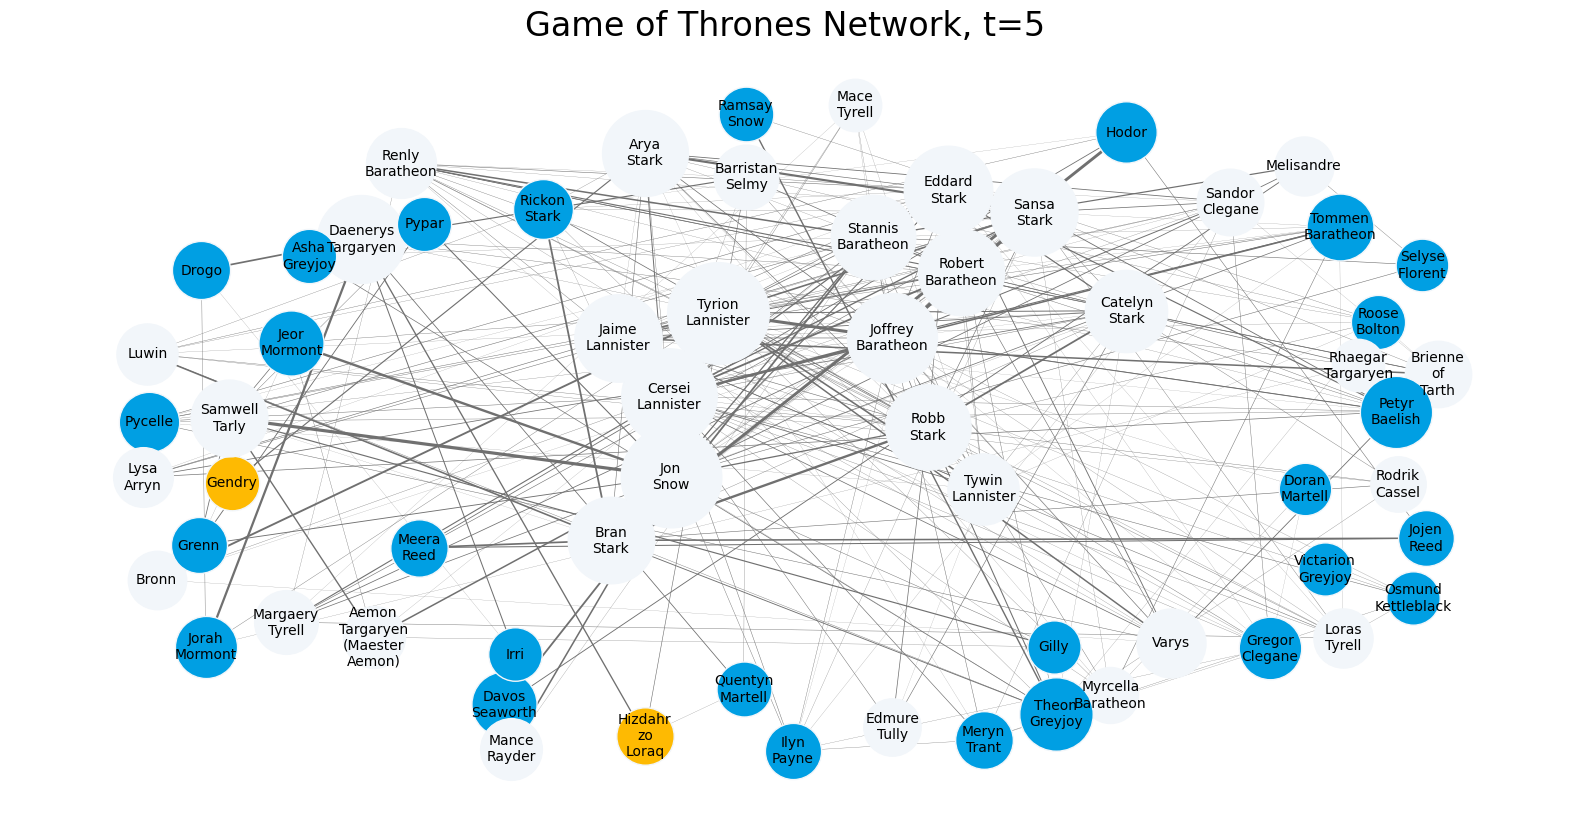

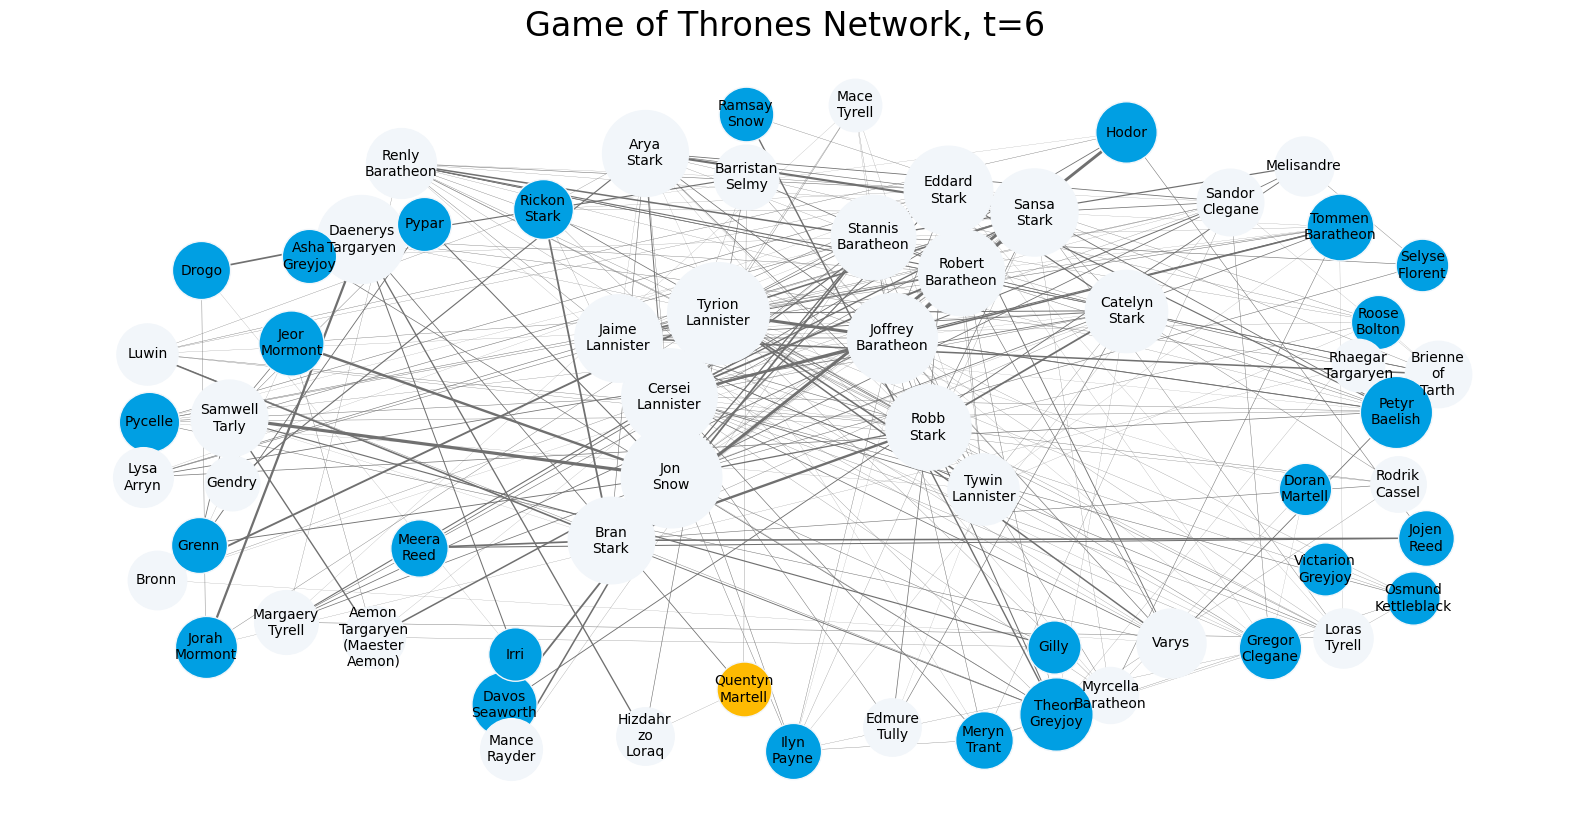

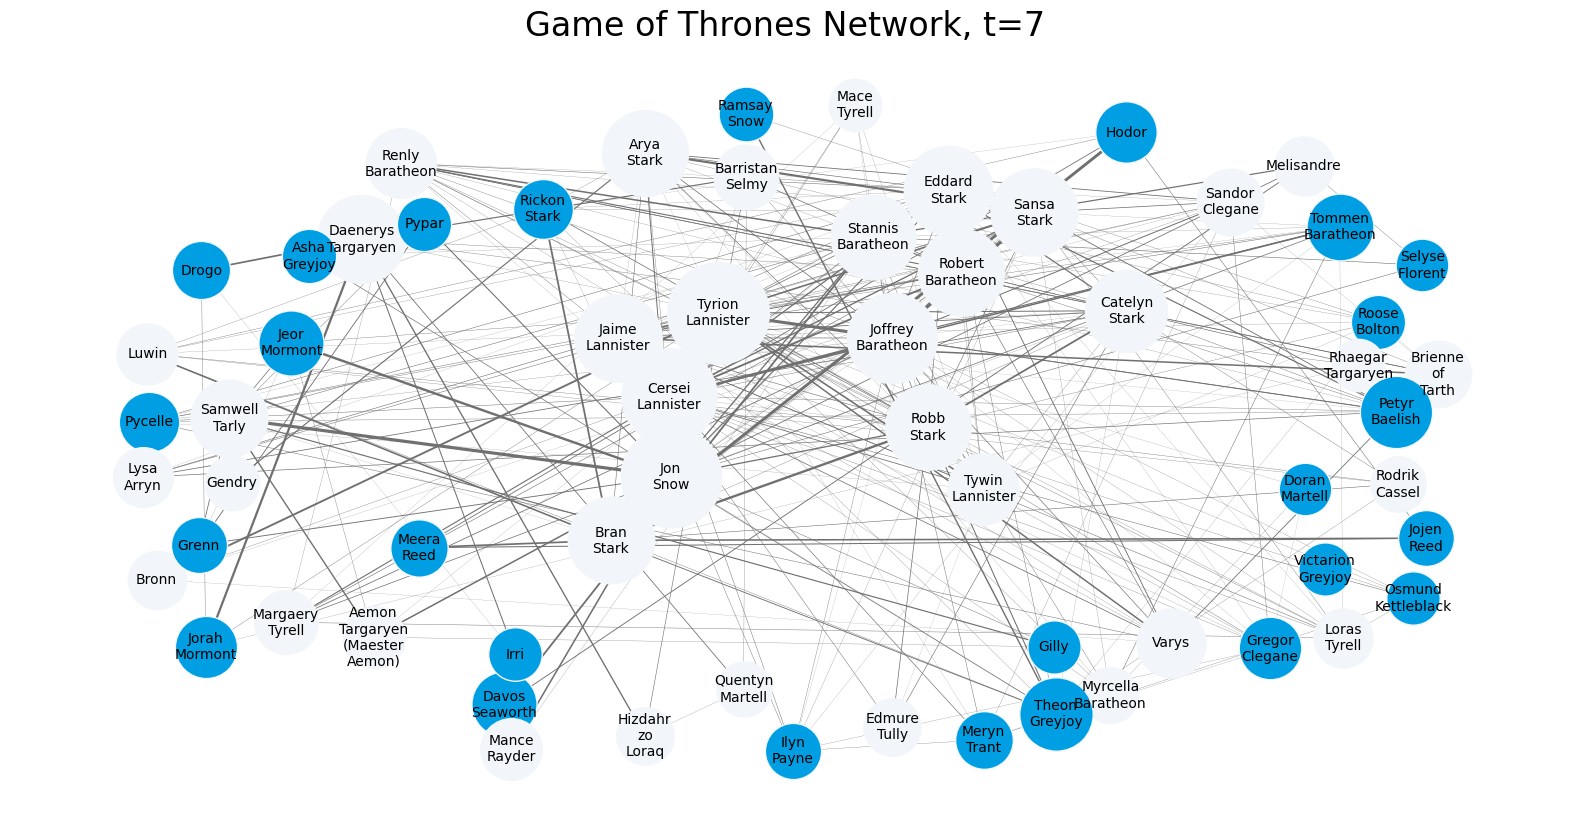

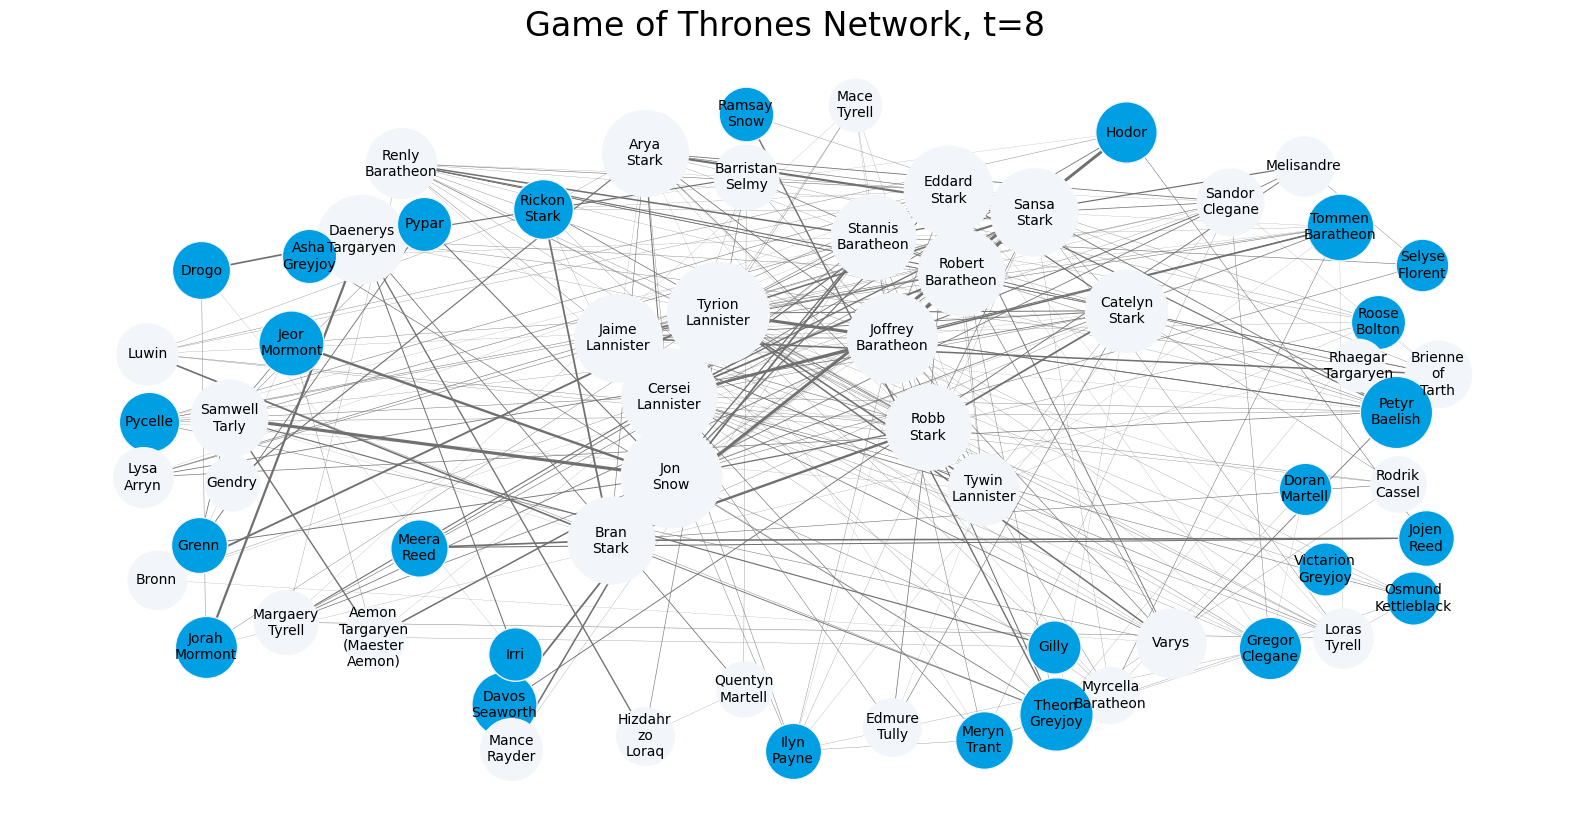

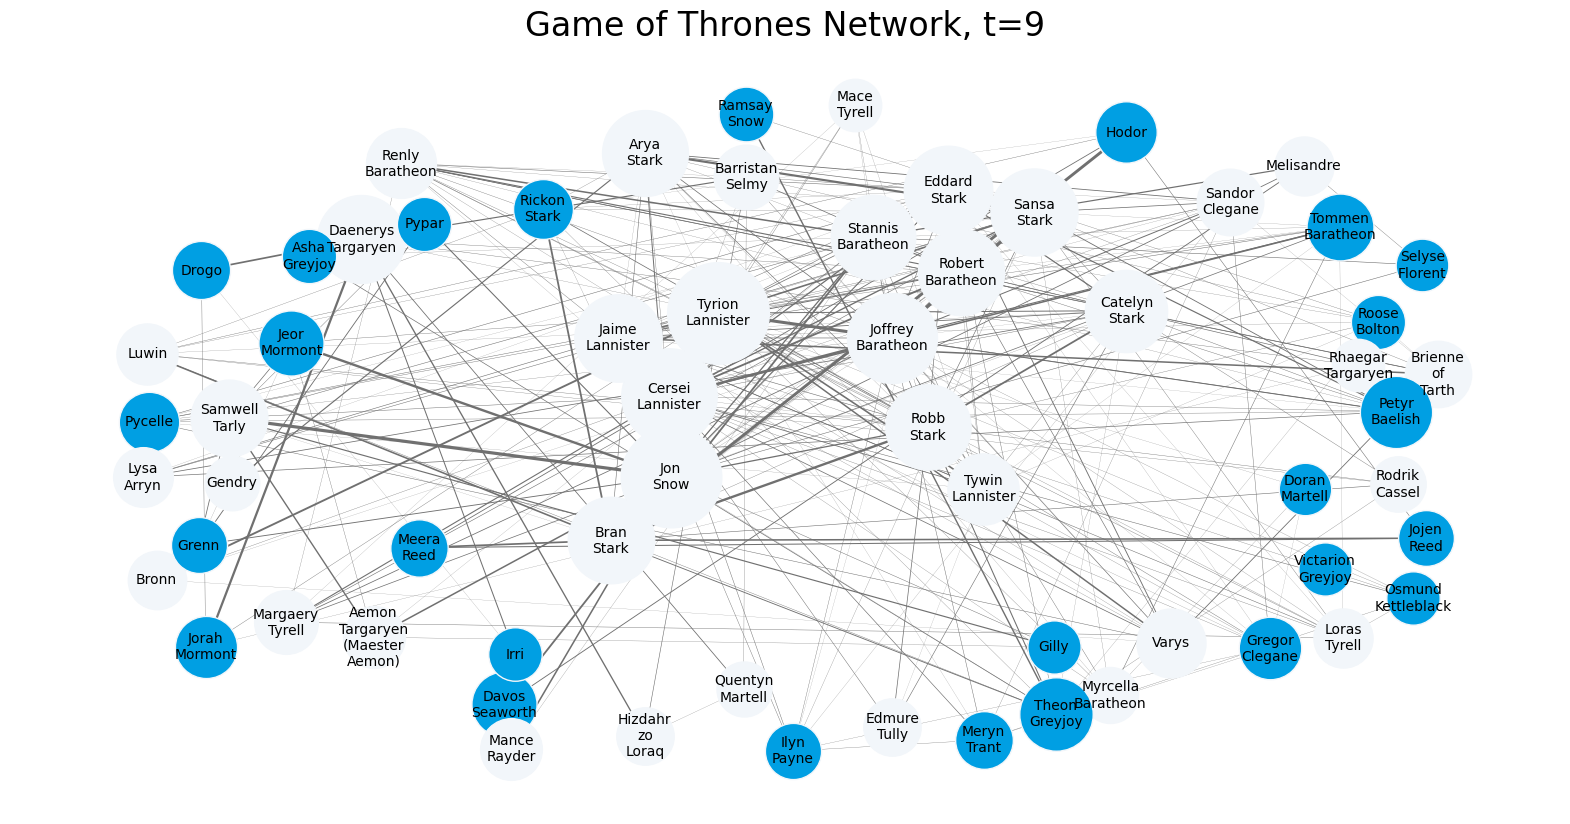

In [32]:
for t in range(10):
    plot_G(subG,pos,infection_times,t)
    infection_times = independent_cascade_of_author(subG,t,infection_times)